In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/final_cleaned_dataset/cleaned_annex.csv')
df.sample(5)

,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
859011,Hongshujian,Flower,0.440,8.0,sale,No
309132,Wuhu Green Pepper (1),Capsicum,0.678,4.0,sale,No
424217,Wuhu Green Pepper (1),Capsicum,0.251,8.0,sale,No
601010,Broccoli,Cabbage,0.465,8.0,sale,No
519146,Red Pepper (1),Capsicum,0.169,16.0,sale,No


In [3]:
df['Sale or Return'].value_counts()

Sale or Return
sale      878042
return       461
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    878503 non-null  object 
 1   Category Name                878503 non-null  object 
 2   Quantity Sold (kilo)         878503 non-null  float64
 3   Unit Selling Price (RMB/kg)  878503 non-null  float64
 4   Sale or Return               878503 non-null  object 
 5   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), object(4)
memory usage: 40.2+ MB


In [5]:
df['Discount (Yes/No)'].value_counts()

Discount (Yes/No)
No     831137
Yes     47366
Name: count, dtype: int64

In [6]:
scaler = StandardScaler()
df.iloc[:,[2, 3]] = scaler.fit_transform(df.iloc[:,[2, 3]])

In [7]:
df['Unit Selling Price (RMB/kg)'].min(), df['Unit Selling Price (RMB/kg)'].max()

(-1.397049336052622, 17.584892414875554)

In [8]:
df.iloc[:,[2, 3]].corr()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
Quantity Sold (kilo),1.000000,-0.374163
Unit Selling Price (RMB/kg),-0.374163,1.000000


In [9]:
df = pd.get_dummies(df)
df.shape

(878503, 254)

In [10]:
df.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper (1),Item Name_7 Colour Pepper (2),Item Name_7 Colour Pepper (Bag),Item Name_Agaricus Bisporus (Bag),Item Name_Agaricus Bisporus (Box),Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth (Bag),...,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower,Category Name_Solanum,Sale or Return_return,Sale or Return_sale,Discount (Yes/No)_No,Discount (Yes/No)_Yes
56858,-0.212733,-0.145319,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
829744,-0.125252,2.009560,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
735697,-0.227730,-0.303766,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
410346,-0.310212,0.171575,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
327105,0.087201,-0.937553,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False


In [ ]:
k_values = range(2,21)

wcss_values = []

for k in k_values:
    print(f'Training : {k}')
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss_values.append(kmeans.inertia_)
    print(f'Clusters --> \u001B[34m{k}\u001B[39m    WCSS --> \u001B[31m{wcss_values[-1]}\u001B[39m')

In [ ]:
# Plot the results
plt.plot(k_values, wcss_values, marker='o')
plt.title('Randomly Sampled WCSS for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [11]:
model = KMeans(n_clusters=13)
pred = model.fit_predict(df)

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
pred

array([8, 6, 8, ..., 3, 2, 8], dtype=int32)

In [13]:
df['cluster'] = pred
df.head(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper (1),Item Name_7 Colour Pepper (2),Item Name_7 Colour Pepper (Bag),Item Name_Agaricus Bisporus (Bag),Item Name_Agaricus Bisporus (Box),Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth (Bag),...,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower,Category Name_Solanum,Sale or Return_return,Sale or Return_sale,Discount (Yes/No)_No,Discount (Yes/No)_Yes,cluster
0,-0.350203,-0.208697,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,8
1,0.782050,-0.905864,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,6
2,-0.317710,-0.208697,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,8
3,-0.287717,0.171575,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,1
4,0.007219,-0.145319,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,1


In [14]:
c1 = df[df['cluster'] == 0]
c2 = df[df['cluster'] == 1]
c3 = df[df['cluster'] == 2]
c4 = df[df['cluster'] == 3]
c5 = df[df['cluster'] == 4]
c6 = df[df['cluster'] == 5]
c7 = df[df['cluster'] == 6]
c8 = df[df['cluster'] == 7]
c9 = df[df['cluster'] == 8]
c10 = df[df['cluster'] == 9]
c11 = df[df['cluster'] == 10]
c12 = df[df['cluster'] == 11]
c13 = df[df['cluster'] == 12]

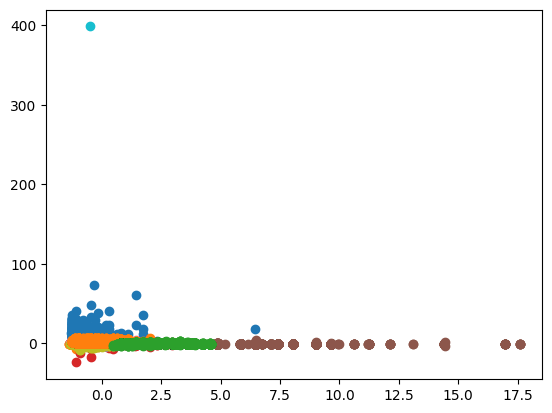

In [15]:
plt.scatter(c1['Unit Selling Price (RMB/kg)'], c1['Quantity Sold (kilo)'])
plt.scatter(c2['Unit Selling Price (RMB/kg)'], c2['Quantity Sold (kilo)'])
plt.scatter(c3['Unit Selling Price (RMB/kg)'], c3['Quantity Sold (kilo)'])
plt.scatter(c4['Unit Selling Price (RMB/kg)'], c4['Quantity Sold (kilo)'])
plt.scatter(c5['Unit Selling Price (RMB/kg)'], c5['Quantity Sold (kilo)'])
plt.scatter(c6['Unit Selling Price (RMB/kg)'], c6['Quantity Sold (kilo)'])
plt.scatter(c7['Unit Selling Price (RMB/kg)'], c7['Quantity Sold (kilo)'])
plt.scatter(c8['Unit Selling Price (RMB/kg)'], c8['Quantity Sold (kilo)'])
plt.scatter(c9['Unit Selling Price (RMB/kg)'], c9['Quantity Sold (kilo)'])
plt.scatter(c10['Unit Selling Price (RMB/kg)'], c10['Quantity Sold (kilo)'])
plt.scatter(c11['Unit Selling Price (RMB/kg)'], c11['Quantity Sold (kilo)'])
plt.scatter(c12['Unit Selling Price (RMB/kg)'], c12['Quantity Sold (kilo)'])
plt.scatter(c13['Unit Selling Price (RMB/kg)'], c13['Quantity Sold (kilo)'])